In [181]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler
plt.style.use('seaborn-darkgrid')

In [182]:
df = pd.read_csv('datasets/train_V2.csv')
df.shape

(5000, 53)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [184]:
(5000-df.isnull().sum()[df.isnull().sum() != 0])/5000*100

income_am           98.94
profit_last_am      98.94
profit_am           98.94
damage_am           99.08
damage_inc          98.94
crd_lim_rec         98.94
credit_use_ic       98.94
gluten_ic           98.94
lactose_ic          98.94
insurance_ic        98.94
spa_ic              99.40
empl_ic             99.98
cab_requests        98.24
bar_no              98.94
sport_ic            98.94
neighbor_income     95.22
age                 98.94
marketing_permit    98.94
urban_ic            98.94
dining_ic           98.24
presidential        98.24
client_segment      98.94
sect_empl           98.94
prev_stay           98.94
prev_all_in_stay    98.94
divorce             98.94
fam_adult_size      98.94
children_no         98.94
tenure_mts          92.16
tenure_yrs          92.16
company_ic          98.94
claims_no           98.94
claims_am           99.46
nights_booked       98.94
gender              98.94
shop_am             98.94
shop_use            98.24
retired             98.94
gold_status 

In [185]:
df.iloc[:,0:15].head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0


In [186]:
df.iloc[:,30:45].head()

,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos
0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN
1,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN
3,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503


In [187]:
df.iloc[:,45:55].head()

,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [188]:
df_converted = df.copy().drop_duplicates()

In [189]:
# , marketing_permit, urban_ic, dining_ic, presidential, prev_stay, prev_all_in_stay, divorce, company_ic, shop_use, retired, gold_status*
cols_to_category = ["married_cd", "credit_use_ic", "gluten_ic", 
"lactose_ic", "insurance_ic", "spa_ic", "empl_ic", "sport_ic",
"marketing_permit", "urban_ic", "dining_ic", "presidential", "prev_stay",
 "prev_all_in_stay", "divorce", "company_ic", "shop_use", "retired", "gold_status"]

df_converted["married_cd"] = df_converted["married_cd"]*1

new_names = {}

for col in cols_to_category:
  df_converted[col] = df_converted[col].astype("category")

  if "_ic" not in col:
    new_name = f"{col}_ic"
    new_names[col] = new_name

df_converted = df_converted.rename(columns=new_names)

In [190]:
df_converted["shop_am"] = df_converted["shop_am"].fillna(0)
df_converted.loc[(df_converted["shop_use_ic"] == 1 ) & (df_converted["shop_am"] == 0), "shop_use_ic"] = 0

In [191]:
to_normal_ints = ['damage_inc', 'cab_requests', 'bar_no' ,'age' , 'sect_empl', 'fam_adult_size',
                  'children_no', 'tenure_mts' , 'tenure_yrs', 'claims_no', 'nights_booked'] 

for col in to_normal_ints:
  df_converted[col] = df_converted[col].fillna(df_converted[col].median())
  df_converted[col] = df_converted[col].astype('int')

In [192]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   income_am              4947 non-null   float64 
 1   profit_last_am         4947 non-null   float64 
 2   profit_am              4947 non-null   float64 
 3   damage_am              4954 non-null   float64 
 4   damage_inc             5000 non-null   int32   
 5   crd_lim_rec            4947 non-null   float64 
 6   credit_use_ic          4947 non-null   category
 7   gluten_ic              4947 non-null   category
 8   lactose_ic             4947 non-null   category
 9   insurance_ic           4947 non-null   category
 10  spa_ic                 4970 non-null   category
 11  empl_ic                4999 non-null   category
 12  cab_requests           5000 non-null   int32   
 13  married_cd_ic          5000 non-null   category
 14  bar_no                 5000 non-null   i

In [193]:
categoricals = ['gender', 'credit_use_ic',  'insurance_ic', 
           'spa_ic',  'married_cd_ic', 'sport_ic', 'marketing_permit_ic',
           'urban_ic', 'dining_ic','presidential_ic', 'prev_stay_ic', 'prev_all_in_stay_ic',
          'company_ic','shop_use_ic','retired_ic','gold_status_ic']

for col in categoricals:
  df_converted[col] = df_converted[col].replace(0.0, "False")
  df_converted[col] = df_converted[col].replace(1.0, "True")

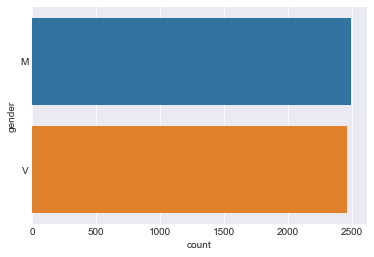

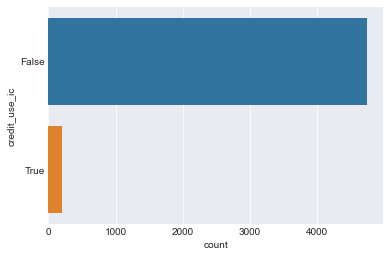

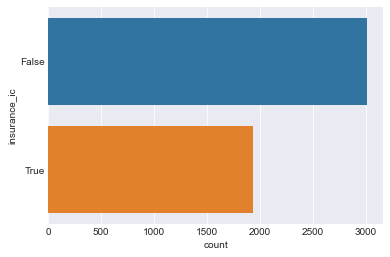

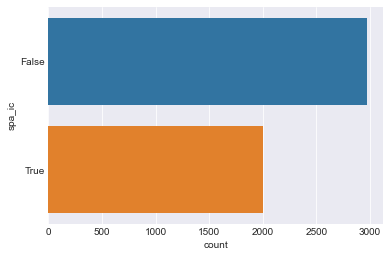

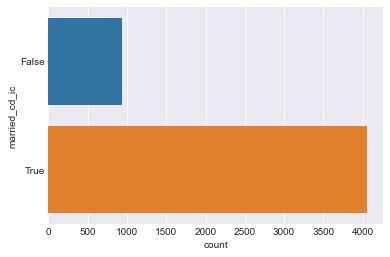

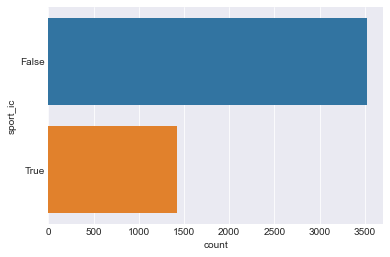

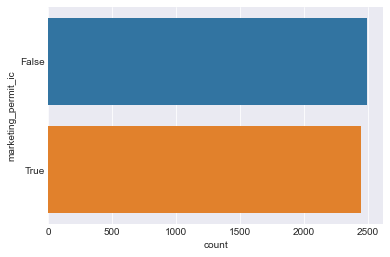

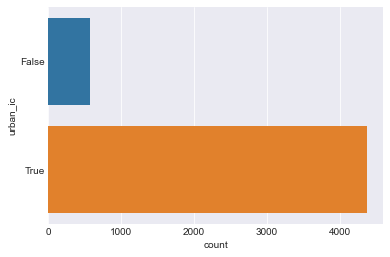

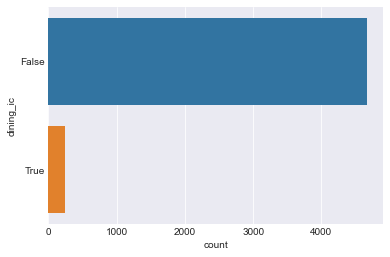

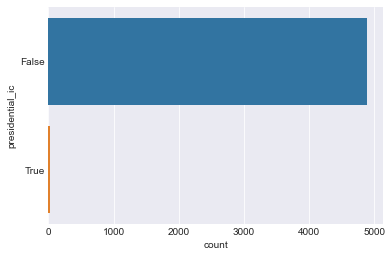

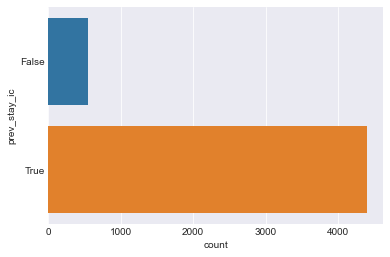

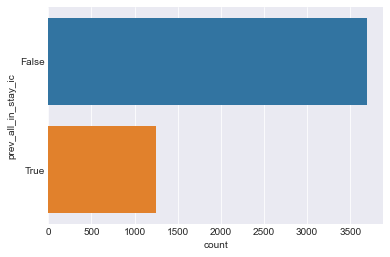

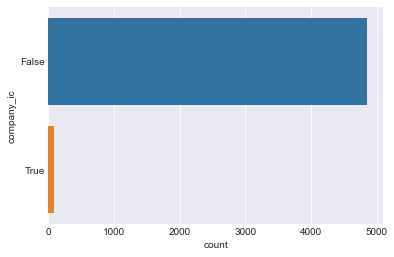

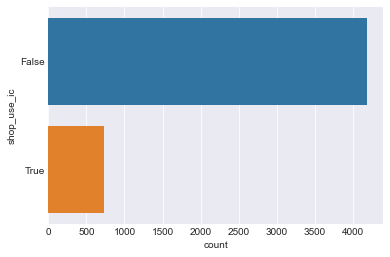

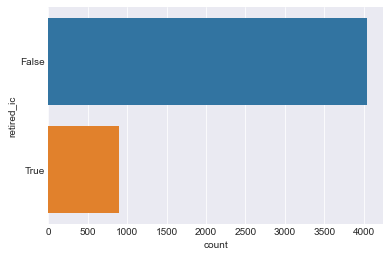

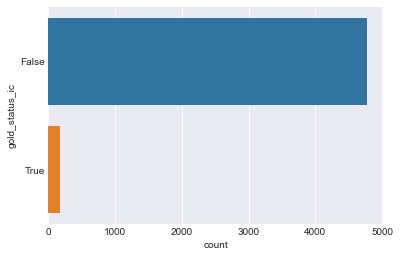

In [194]:
for i in categoricals: 
    sns.countplot(y=df_converted[i])
    plt.show()

###scores gedropt waarom:
-Tenure_mth bestaat in de dataset & tenure_yrs is niet nauwkeurig, dus tenure_yrs wordt gedropped

-gluten_ic & lactose_ic hebben weinig invloed op het koopgedrag van de klant

-divorce_ic heeft enkel een negatieve correlatie met het feit ofdat een klant aldaniet getrouwd dus weinig nut om te houden omdat het geen andere features beinvloed

-de positieve & negatieve scores van de staff hebben geen invloed op de outcome_damage, outcome_profit & outcome_damage_inc dus worden ook gedropt

In [195]:
df_converted = df_converted.drop(['tenure_yrs', 'gluten_ic', 'lactose_ic','empl_ic', "divorce_ic",'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)

C:\Users\robbe\AppData\Local\Temp/ipykernel_17344/2250700739.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_converted = df_converted.drop(['tenure_yrs', 'gluten_ic', 'lactose_ic','empl_ic', "divorce_ic",'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)


In [196]:
df_converted.isnull().sum()[df_converted.isnull().sum()!=0]

income_am               53
profit_last_am          53
profit_am               53
damage_am               46
crd_lim_rec             53
credit_use_ic           53
insurance_ic            53
spa_ic                  30
sport_ic                53
neighbor_income        239
marketing_permit_ic     53
urban_ic                53
dining_ic               88
presidential_ic         88
client_segment          53
prev_stay_ic            53
prev_all_in_stay_ic     53
company_ic              53
claims_am               27
gender                  53
shop_use_ic             88
retired_ic              53
gold_status_ic          53
dtype: int64

In [197]:
df_imputed = df_converted.copy()

In [198]:
for col in categoricals:
    df_imputed[col] = df_imputed[col].astype('category')
    df_imputed[col] = df_imputed[col].cat.add_categories('Undefined')
    df_imputed[col] = df_imputed[col].fillna('Undefined')
    df_imputed[col] = df_imputed[col].astype('object')

In [199]:
num_feat = df_imputed.select_dtypes(include=['int64', 'float64']).columns
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(df_imputed[num_feat])
df_imputed[num_feat] = mean_imputer.transform(df_imputed[num_feat].values)

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [200]:
df_imputed.isnull().sum()[df_imputed.isnull().sum()!=0]

Series([], dtype: int64)

In [201]:
df_dummy_var = df_imputed.copy()
for col in df_dummy_var:
    if df_dummy_var[col].dtype ==  'object':
        dummies = pd.get_dummies(df_dummy_var[col], dummy_na=False, prefix=col)  
        df_dummy_var = pd.concat([df_dummy_var, dummies],axis=1)                   
        df_dummy_var.drop(columns=[col], inplace=True)  

In [202]:
df_dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income_am                      5000 non-null   float64
 1   profit_last_am                 5000 non-null   float64
 2   profit_am                      5000 non-null   float64
 3   damage_am                      5000 non-null   float64
 4   damage_inc                     5000 non-null   int32  
 5   crd_lim_rec                    5000 non-null   float64
 6   cab_requests                   5000 non-null   int32  
 7   bar_no                         5000 non-null   int32  
 8   neighbor_income                5000 non-null   float64
 9   age                            5000 non-null   int32  
 10  client_segment                 5000 non-null   float64
 11  sect_empl                      5000 non-null   int32  
 12  fam_adult_size                 5000 non-null   i

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>],
       [<AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'shop_am'}>],
       [<AxesSubplot:title={'center':'outcome_profit'}>,
        <AxesSubplot:title={'center':'outcome_damage_amount'}>,
        <AxesSubplot:>]], dtype=object)

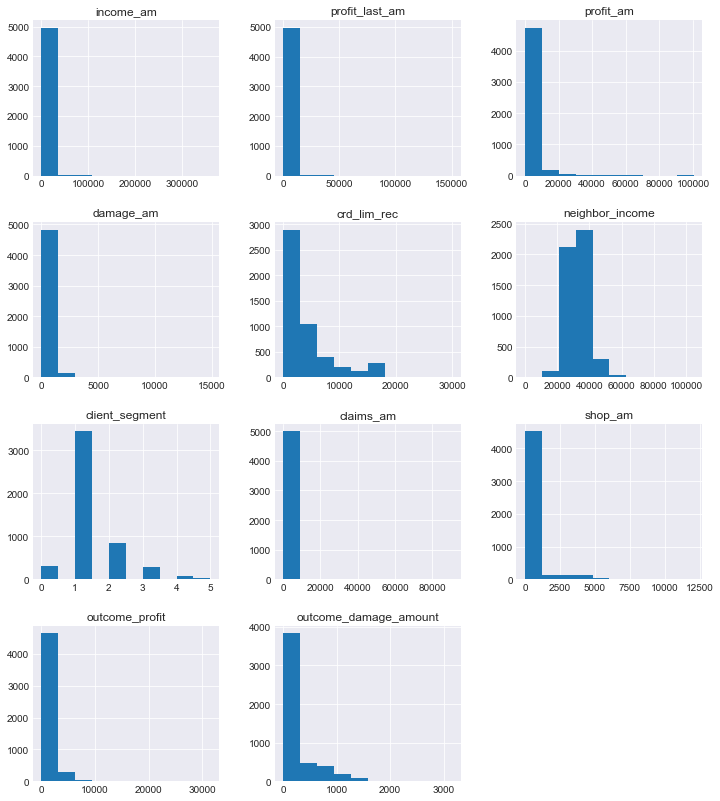

In [203]:
df_transformed = df_dummy_var.copy()

num = df_transformed.select_dtypes(include=['int64', 'float64']).columns
num = num.drop(['outcome_damage_inc'],1)
df_transformed[num].hist( figsize = (12,14))

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>],
       [<AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'shop_am'}>],
       [<AxesSubplot:title={'center':'outcome_profit'}>,
        <AxesSubplot:title={'center':'outcome_damage_amount'}>,
        <AxesSubplot:>]], dtype=object)

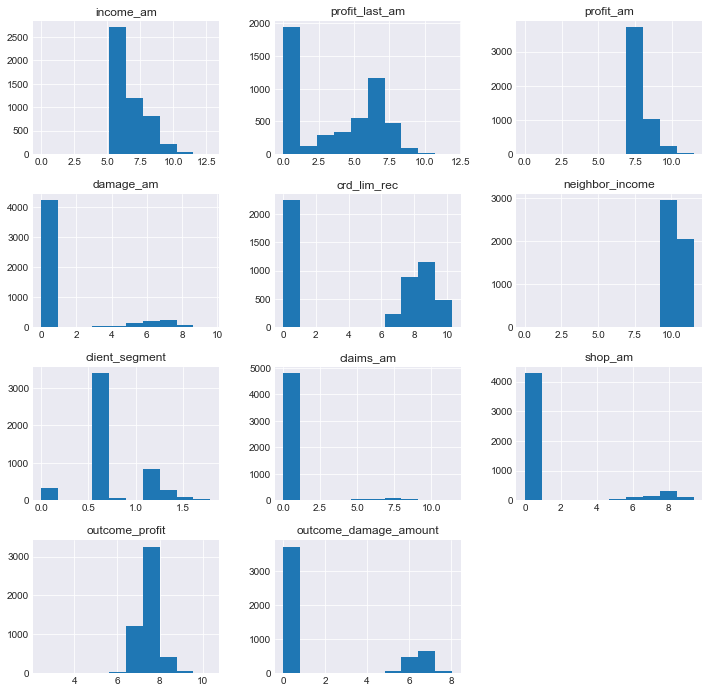

In [204]:
skewed = df_transformed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df_transformed[skewed] = np.log1p(df_transformed[skewed])
df_transformed[num].hist( figsize = (12,12))

In [205]:
num_feat = df_transformed.select_dtypes(include=['int64', 'float64']).columns

scaler = RobustScaler()
scaler.fit(df_transformed[num_feat])
df_transformed[num_feat] = scaler.transform(df_transformed[num_feat])

df_transformed.to_csv(f'datasets/trainV2_cleaned.csv', index=False)